In [ ]:
# !pip install ultralytics
# !pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 60.6 MB/s eta 0:00:00:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsnbextension-3.6.9
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab_widgets 3.0.11
    Uninstalling jupyterlab_widgets-3.0.11:
      Successfully uninstalled jupyterlab_widgets-3.0.11
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
b

In [ ]:
import pandas as pd
import numpy as np
import os

In [3]:
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO

from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob

In [5]:
image = cv2.imread("/kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/train/images/Fig100_PLS_JPG.rf.56228861e8f12fca524e9551259c4a22.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 780x311 and 3 channels.


In [6]:
model = YOLO("yolov8n.pt") 

100%|██████████| 6.25M/6.25M [00:00<00:00, 100MB/s]



image 1/1 /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/train/images/Fig100_PLS_JPG.rf.56228861e8f12fca524e9551259c4a22.jpg: 256x640 (no detections), 85.6ms
Speed: 9.3ms preprocess, 85.6ms inference, 79.8ms postprocess per image at shape (1, 3, 256, 640)


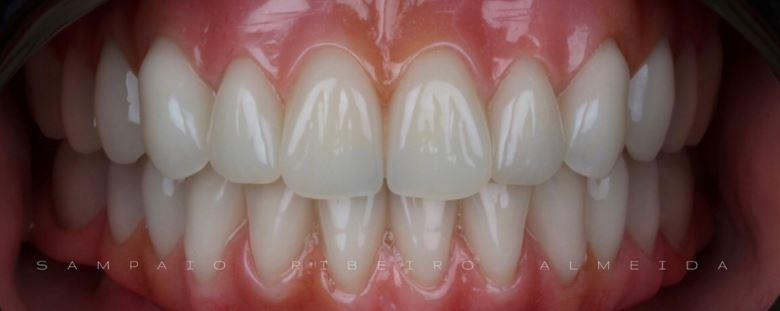

In [7]:
# Use the model to detect object
image = "/kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/train/images/Fig100_PLS_JPG.rf.56228861e8f12fca524e9551259c4a22.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [8]:
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')  

Transferred 355/355 items from pretrained weights


In [9]:
file_link="/kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/data.yaml"

In [10]:
Dental_model_trained = Final_model.train(data=file_link,epochs=75, imgsz = 640, batch = 16 ,lr0=0.01, dropout= 0.15, device = 0)

Ultralytics 8.3.29 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/data.yaml, epochs=75, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

100%|██████████| 755k/755k [00:00<00:00, 20.8MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 91.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/train/labels... 505 images, 0 backgrounds, 0 corrupt: 100%|██████████| 505/505 [00:01<00:00, 270.54it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/valid/labels... 112 images, 0 backgrounds, 0 corrupt: 100%|██████████| 112/112 [00:00<00:00, 257.85it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      2.81G      1.103      3.542       1.12        350        640: 100%|██████████| 32/32 [00:07<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]


                   all        112       2437     0.0582      0.693      0.238      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      3.14G      1.023      2.079       1.03        351        640: 100%|██████████| 32/32 [00:05<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        112       2437      0.531       0.47      0.455      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      2.91G       0.96      1.353      1.036        468        640: 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.44it/s]

                   all        112       2437      0.506      0.745      0.586      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      2.85G     0.9125      1.104      1.028        405        640: 100%|██████████| 32/32 [00:05<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        112       2437       0.63       0.75      0.676      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      2.96G     0.8993     0.9733      1.021        330        640: 100%|██████████| 32/32 [00:05<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.53it/s]

                   all        112       2437      0.702      0.801      0.778      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      2.93G      0.875     0.8875      1.005        381        640: 100%|██████████| 32/32 [00:05<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.60it/s]

                   all        112       2437       0.79      0.858      0.861      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      2.75G      0.862     0.8676     0.9973        352        640: 100%|██████████| 32/32 [00:05<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        112       2437      0.797      0.846      0.867      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      2.77G     0.8538     0.8109     0.9974        298        640: 100%|██████████| 32/32 [00:05<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        112       2437      0.826      0.862      0.872      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75       2.7G     0.8473      0.764     0.9859        367        640: 100%|██████████| 32/32 [00:05<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.80it/s]

                   all        112       2437      0.846      0.892      0.915        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      3.04G     0.8509     0.7555     0.9936        359        640: 100%|██████████| 32/32 [00:05<00:00,  6.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.55it/s]

                   all        112       2437      0.857      0.913      0.926        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      3.16G     0.8396     0.7216     0.9864        354        640: 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        112       2437      0.865      0.899      0.931      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      2.58G     0.8336     0.7077     0.9793        432        640: 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.10it/s]

                   all        112       2437      0.851      0.894      0.925      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      3.14G     0.8237     0.6688     0.9817        330        640: 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all        112       2437      0.846      0.895      0.925      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      2.83G     0.8361      0.645     0.9747        408        640: 100%|██████████| 32/32 [00:05<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.20it/s]

                   all        112       2437      0.888      0.906      0.948      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      2.86G     0.8196     0.6265     0.9726        333        640: 100%|██████████| 32/32 [00:05<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.47it/s]

                   all        112       2437      0.894      0.924      0.958      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      3.19G     0.8126     0.6166     0.9653        355        640: 100%|██████████| 32/32 [00:05<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]

                   all        112       2437      0.899      0.921      0.949      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      2.89G     0.8096     0.6175     0.9666        478        640: 100%|██████████| 32/32 [00:05<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.49it/s]

                   all        112       2437      0.899        0.9      0.952      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      2.54G     0.8125     0.6191     0.9679        433        640: 100%|██████████| 32/32 [00:05<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.82it/s]

                   all        112       2437      0.912      0.923      0.956      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      3.03G     0.7921     0.5953     0.9625        362        640: 100%|██████████| 32/32 [00:05<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.21it/s]

                   all        112       2437      0.909      0.939      0.961       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75      3.24G     0.8032     0.5803      0.967        424        640: 100%|██████████| 32/32 [00:06<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.89it/s]

                   all        112       2437      0.928      0.932      0.964      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      2.86G     0.7866     0.5644       0.96        328        640: 100%|██████████| 32/32 [00:05<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.21it/s]

                   all        112       2437      0.936      0.918      0.964      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      2.94G     0.7916     0.5587     0.9574        380        640: 100%|██████████| 32/32 [00:05<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.96it/s]

                   all        112       2437      0.905      0.931      0.961      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      2.52G     0.7844     0.5671     0.9609        310        640: 100%|██████████| 32/32 [00:05<00:00,  5.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.87it/s]

                   all        112       2437      0.903      0.882      0.943      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75       2.9G     0.7874     0.5642     0.9611        456        640: 100%|██████████| 32/32 [00:05<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.91it/s]

                   all        112       2437      0.914      0.937       0.96      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      3.13G     0.7833      0.551     0.9565        348        640: 100%|██████████| 32/32 [00:05<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.36it/s]

                   all        112       2437      0.926      0.946      0.967      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      2.56G     0.7872     0.5489     0.9626        295        640: 100%|██████████| 32/32 [00:05<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.64it/s]

                   all        112       2437      0.911      0.937      0.967      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      3.44G     0.7792     0.5342     0.9564        277        640: 100%|██████████| 32/32 [00:05<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.93it/s]

                   all        112       2437      0.929      0.944      0.972      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      2.97G     0.7764     0.5279     0.9548        361        640: 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]

                   all        112       2437      0.938      0.934      0.968      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      2.88G     0.7706     0.5161      0.947        415        640: 100%|██████████| 32/32 [00:05<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.65it/s]

                   all        112       2437      0.923      0.938      0.968      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      3.13G     0.7728     0.5207     0.9503        486        640: 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.17it/s]

                   all        112       2437      0.945      0.933      0.972       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      2.54G     0.7798     0.5228     0.9566        402        640: 100%|██████████| 32/32 [00:05<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.97it/s]

                   all        112       2437       0.93      0.951      0.969      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75         3G     0.7739     0.5144     0.9522        405        640: 100%|██████████| 32/32 [00:05<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all        112       2437      0.921      0.946      0.968      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      2.94G     0.7662     0.5033     0.9533        356        640: 100%|██████████| 32/32 [00:05<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.88it/s]

                   all        112       2437      0.922      0.937      0.963       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      2.76G     0.7536     0.4955     0.9401        313        640: 100%|██████████| 32/32 [00:05<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.08it/s]

                   all        112       2437      0.952      0.934      0.973       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      3.29G     0.7605     0.4985     0.9501        360        640: 100%|██████████| 32/32 [00:05<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]

                   all        112       2437       0.93      0.941      0.968      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      3.21G     0.7635     0.4942     0.9467        429        640: 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.03it/s]

                   all        112       2437      0.932      0.937      0.965      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      3.18G     0.7652     0.4982     0.9495        221        640: 100%|██████████| 32/32 [00:05<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]

                   all        112       2437      0.943      0.933      0.972      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      2.75G     0.7561     0.4857     0.9471        421        640: 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.19it/s]

                   all        112       2437      0.952       0.94      0.972      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      2.82G     0.7504     0.4786     0.9414        444        640: 100%|██████████| 32/32 [00:05<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.33it/s]

                   all        112       2437      0.938      0.947      0.972       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      2.73G     0.7436     0.4775     0.9373        440        640: 100%|██████████| 32/32 [00:05<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.58it/s]

                   all        112       2437      0.929      0.945      0.972      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      3.02G     0.7498     0.4759     0.9424        373        640: 100%|██████████| 32/32 [00:05<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.48it/s]

                   all        112       2437      0.952      0.932      0.972      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      3.16G      0.762      0.477     0.9412        429        640: 100%|██████████| 32/32 [00:05<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.61it/s]

                   all        112       2437      0.944      0.953      0.974      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      3.18G     0.7408     0.4648     0.9432        394        640: 100%|██████████| 32/32 [00:05<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all        112       2437      0.914      0.951      0.965      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      2.88G     0.7477     0.4682     0.9414        334        640: 100%|██████████| 32/32 [00:05<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.41it/s]

                   all        112       2437      0.948      0.941      0.974      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      3.03G     0.7436     0.4654     0.9401        408        640: 100%|██████████| 32/32 [00:05<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.02it/s]

                   all        112       2437      0.944      0.952      0.977      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      3.09G     0.7445     0.4614     0.9416        396        640: 100%|██████████| 32/32 [00:05<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.37it/s]

                   all        112       2437      0.935      0.954      0.975      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      2.89G     0.7495       0.46     0.9429        378        640: 100%|██████████| 32/32 [00:05<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.12it/s]

                   all        112       2437      0.942      0.949      0.974      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      2.74G      0.731     0.4569      0.935        364        640: 100%|██████████| 32/32 [00:05<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.92it/s]

                   all        112       2437       0.94      0.944      0.965      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      3.29G     0.7265      0.451     0.9333        381        640: 100%|██████████| 32/32 [00:05<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]

                   all        112       2437      0.938      0.956      0.977      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75       2.7G     0.7294     0.4559     0.9344        432        640: 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.31it/s]

                   all        112       2437      0.938      0.949      0.966      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      2.54G     0.7298     0.4491     0.9344        292        640: 100%|██████████| 32/32 [00:05<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.19it/s]

                   all        112       2437      0.952      0.936      0.975      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      3.23G     0.7228     0.4431     0.9301        355        640: 100%|██████████| 32/32 [00:05<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.86it/s]

                   all        112       2437      0.937      0.955      0.976      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      2.75G     0.7306     0.4437     0.9373        391        640: 100%|██████████| 32/32 [00:05<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]

                   all        112       2437      0.928      0.942      0.969      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      3.07G     0.7292     0.4475     0.9319        460        640: 100%|██████████| 32/32 [00:05<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.98it/s]

                   all        112       2437      0.933      0.958      0.974      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      2.89G     0.7249     0.4457     0.9328        274        640: 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]

                   all        112       2437       0.94      0.955      0.977      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      2.72G      0.719      0.437      0.925        351        640: 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]

                   all        112       2437      0.943      0.963      0.977      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      2.95G     0.7185     0.4323     0.9241        455        640: 100%|██████████| 32/32 [00:05<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.01it/s]

                   all        112       2437      0.955      0.956      0.981      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      2.72G     0.7162     0.4337      0.928        359        640: 100%|██████████| 32/32 [00:05<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.59it/s]

                   all        112       2437      0.943      0.945      0.971      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75      3.12G     0.7095     0.4287     0.9247        445        640: 100%|██████████| 32/32 [00:05<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]

                   all        112       2437      0.952      0.959      0.979      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      2.94G     0.7091     0.4255     0.9248        432        640: 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.76it/s]

                   all        112       2437       0.94      0.962      0.976      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      3.14G     0.7135       0.43     0.9295        376        640: 100%|██████████| 32/32 [00:05<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.44it/s]

                   all        112       2437      0.948      0.954      0.976      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      3.32G     0.7111     0.4287     0.9272        351        640: 100%|██████████| 32/32 [00:05<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.09it/s]

                   all        112       2437      0.943      0.944      0.974      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      2.71G     0.7096     0.4269     0.9284        400        640: 100%|██████████| 32/32 [00:05<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]

                   all        112       2437      0.946      0.955      0.977      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75      2.96G     0.7079     0.4206     0.9224        422        640: 100%|██████████| 32/32 [00:05<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]

                   all        112       2437      0.939      0.956      0.975      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      3.04G     0.7037     0.4162     0.9219        348        640: 100%|██████████| 32/32 [00:05<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.32it/s]

                   all        112       2437      0.943       0.96      0.977      0.767


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      2.27G     0.6924     0.4344     0.9213        149        640: 100%|██████████| 32/32 [00:05<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.99it/s]

                   all        112       2437      0.939      0.948      0.973      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      2.27G     0.6856     0.4062      0.915        166        640: 100%|██████████| 32/32 [00:05<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.72it/s]

                   all        112       2437      0.936      0.955       0.97      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      2.27G     0.6738     0.3994     0.9059        167        640: 100%|██████████| 32/32 [00:05<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.13it/s]

                   all        112       2437      0.935      0.958      0.968      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75      2.26G     0.6815     0.3992     0.9116        163        640: 100%|██████████| 32/32 [00:05<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.32it/s]

                   all        112       2437      0.946      0.949      0.971      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      2.27G     0.6725     0.3885     0.9074        165        640: 100%|██████████| 32/32 [00:04<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.43it/s]

                   all        112       2437      0.944      0.954      0.975      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      2.26G     0.6716      0.387     0.9054        179        640: 100%|██████████| 32/32 [00:05<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.57it/s]

                   all        112       2437      0.951      0.951      0.975      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      2.27G     0.6717     0.3851     0.9077        192        640: 100%|██████████| 32/32 [00:05<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  5.46it/s]

                   all        112       2437      0.938      0.956      0.971      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      2.26G     0.6593     0.3808     0.8999        192        640: 100%|██████████| 32/32 [00:05<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.51it/s]

                   all        112       2437      0.943      0.958      0.972      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      2.26G     0.6616     0.3793     0.9032        177        640: 100%|██████████| 32/32 [00:05<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.11it/s]

                   all        112       2437      0.942      0.959      0.972      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75      2.27G     0.6607     0.3766     0.9019        191        640: 100%|██████████| 32/32 [00:04<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00,  6.28it/s]

                   all        112       2437      0.951      0.949      0.973      0.768



75 epochs completed in 0.142 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
WARNING ⚠️ validating an untrained model YAML will result in 0 mAP.
Ultralytics 8.3.29 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]


                   all        112       2437      0.959      0.954      0.981      0.774
             1st Molar        106        323       0.93      0.923      0.973      0.671
          1st Premolar        111        386      0.973      0.984      0.989      0.792
             2nd Molar         74        157      0.901      0.885      0.941       0.62
          2nd Premolar        109        364      0.957      0.937      0.985      0.726
                Canine        112        401       0.98      0.978      0.989      0.851
       Central Incisor        112        403      0.985      0.993      0.995      0.888
       Lateral Incisor        112        403      0.985      0.982      0.994      0.867
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/train


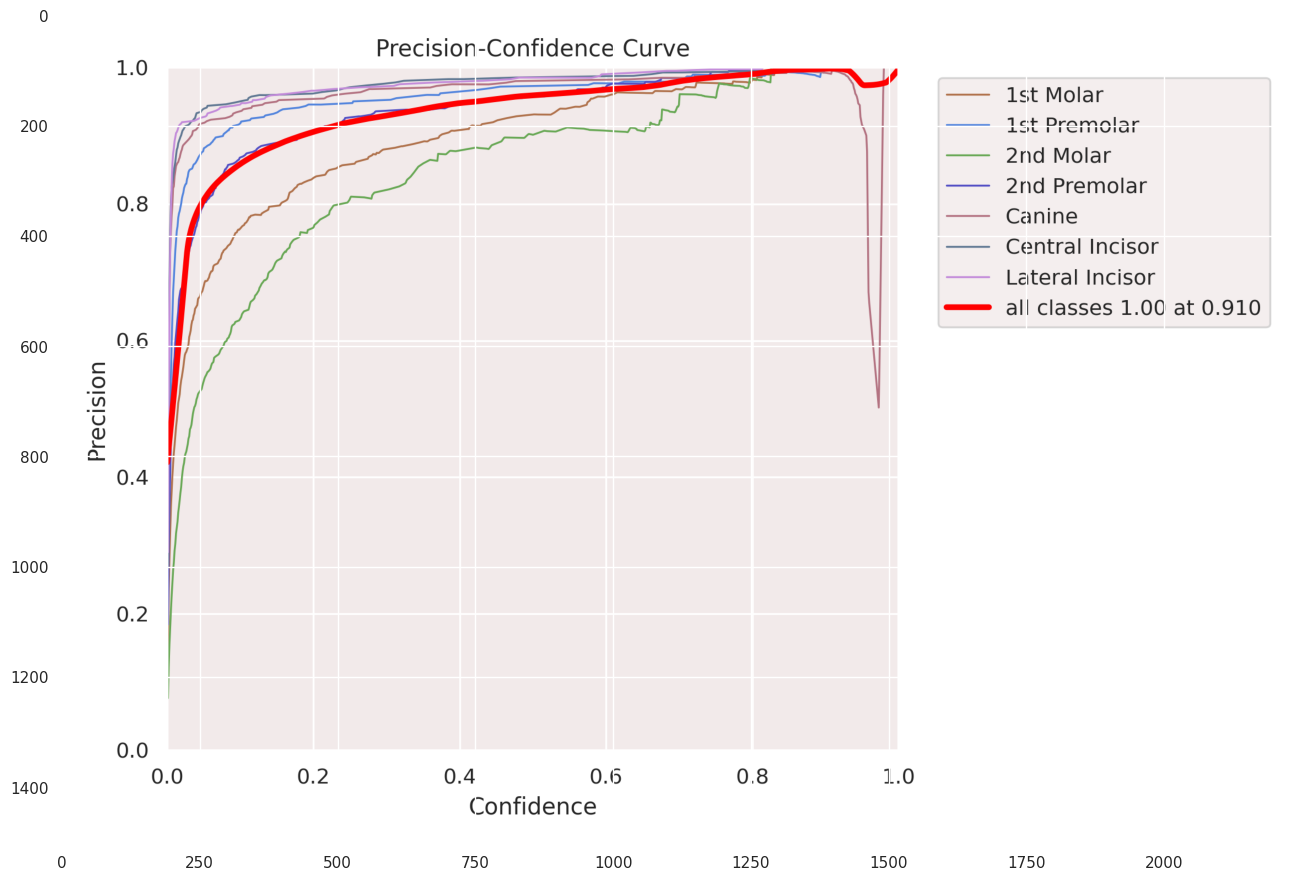

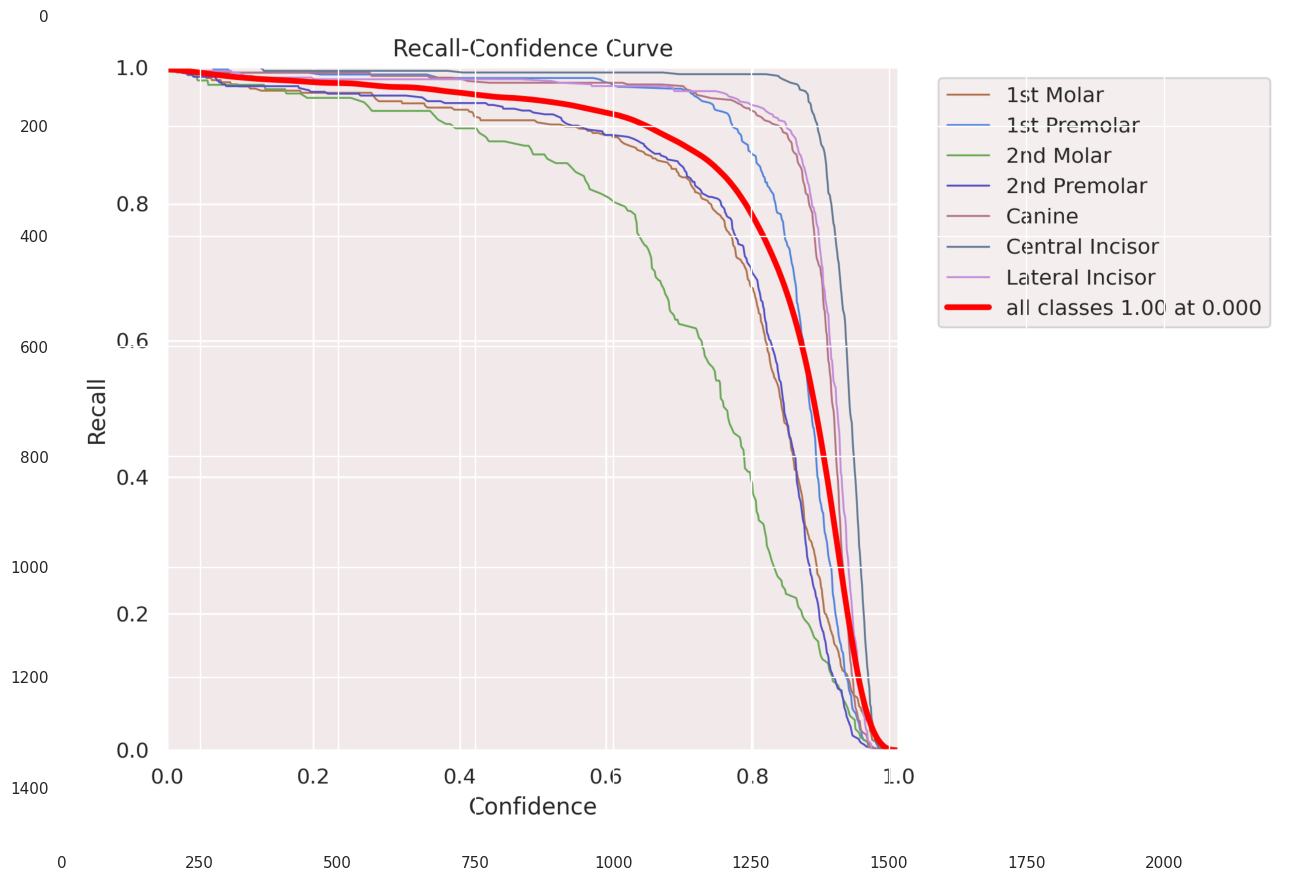

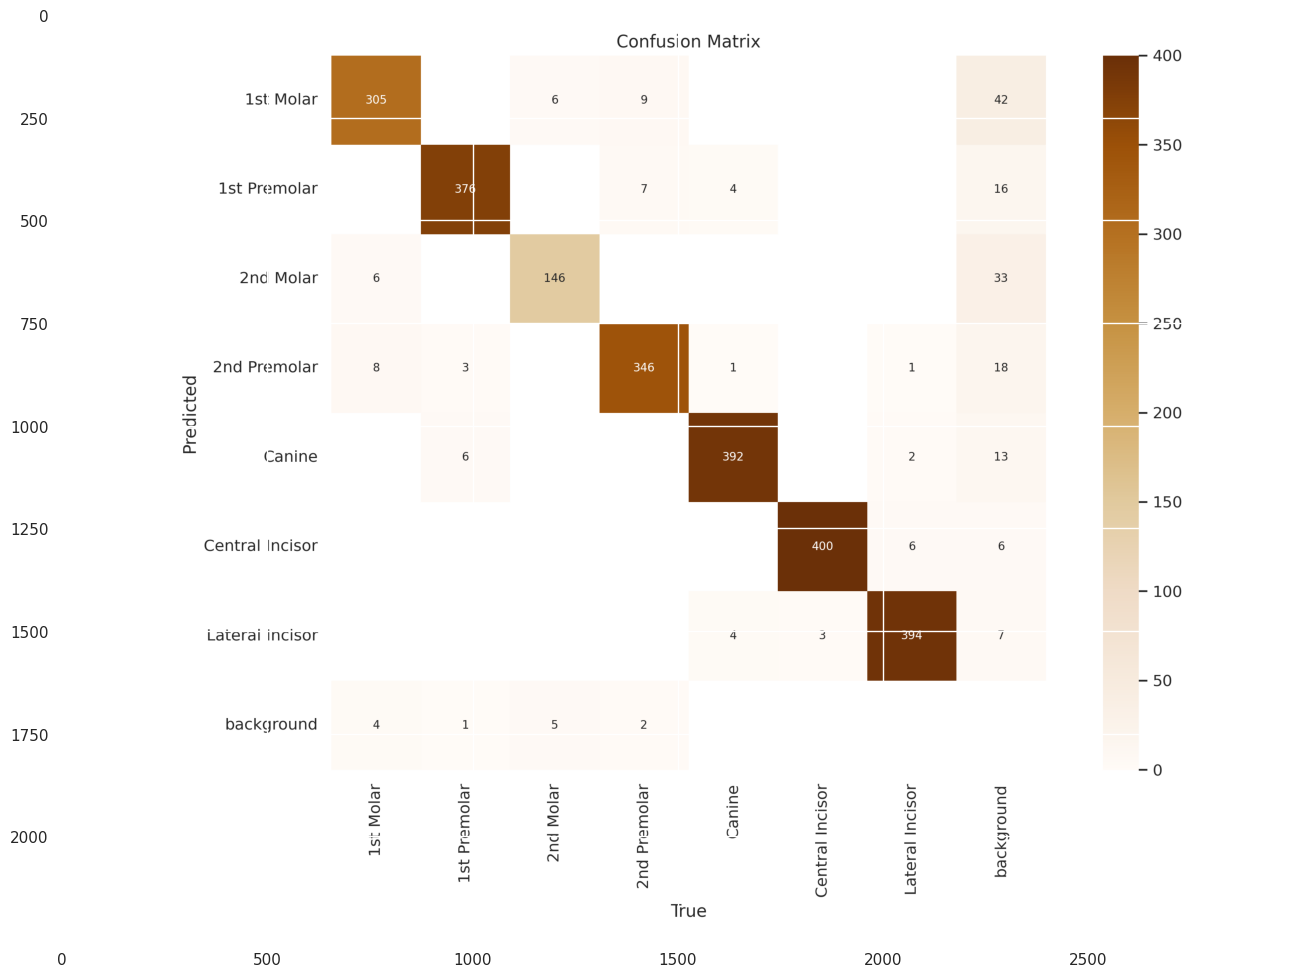

In [12]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]
for i in list_of_metrics:
    img = cv2.imread(f"/kaggle/working/runs/detect/train/{i}")
    plt.figure(figsize = (16, 12))
    plt.imshow(np.array(img))
    plt.show()

In [13]:
results = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
results.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,13.8619,1.10257,3.54238,1.11999,0.05824,0.69323,0.23794,0.18653,0.93777,3.23881,0.93330,0.000282,0.000282,0.000282
1,2,21.0371,1.02262,2.07884,1.02982,0.53054,0.47021,0.45467,0.35150,0.93940,2.23051,0.98698,0.000565,0.000565,0.000565
2,3,27.8648,0.96003,1.35324,1.03644,0.50564,0.74518,0.58641,0.45081,0.89844,1.40436,1.01384,0.000841,0.000841,0.000841
3,4,34.5328,0.91250,1.10357,1.02846,0.62990,0.75024,0.67623,0.50417,0.89278,1.21488,1.01814,0.000873,0.000873,0.000873
4,5,41.1906,0.89929,0.97333,1.02094,0.70224,0.80066,0.77789,0.57507,0.85945,1.08576,0.99250,0.000861,0.000861,0.000861


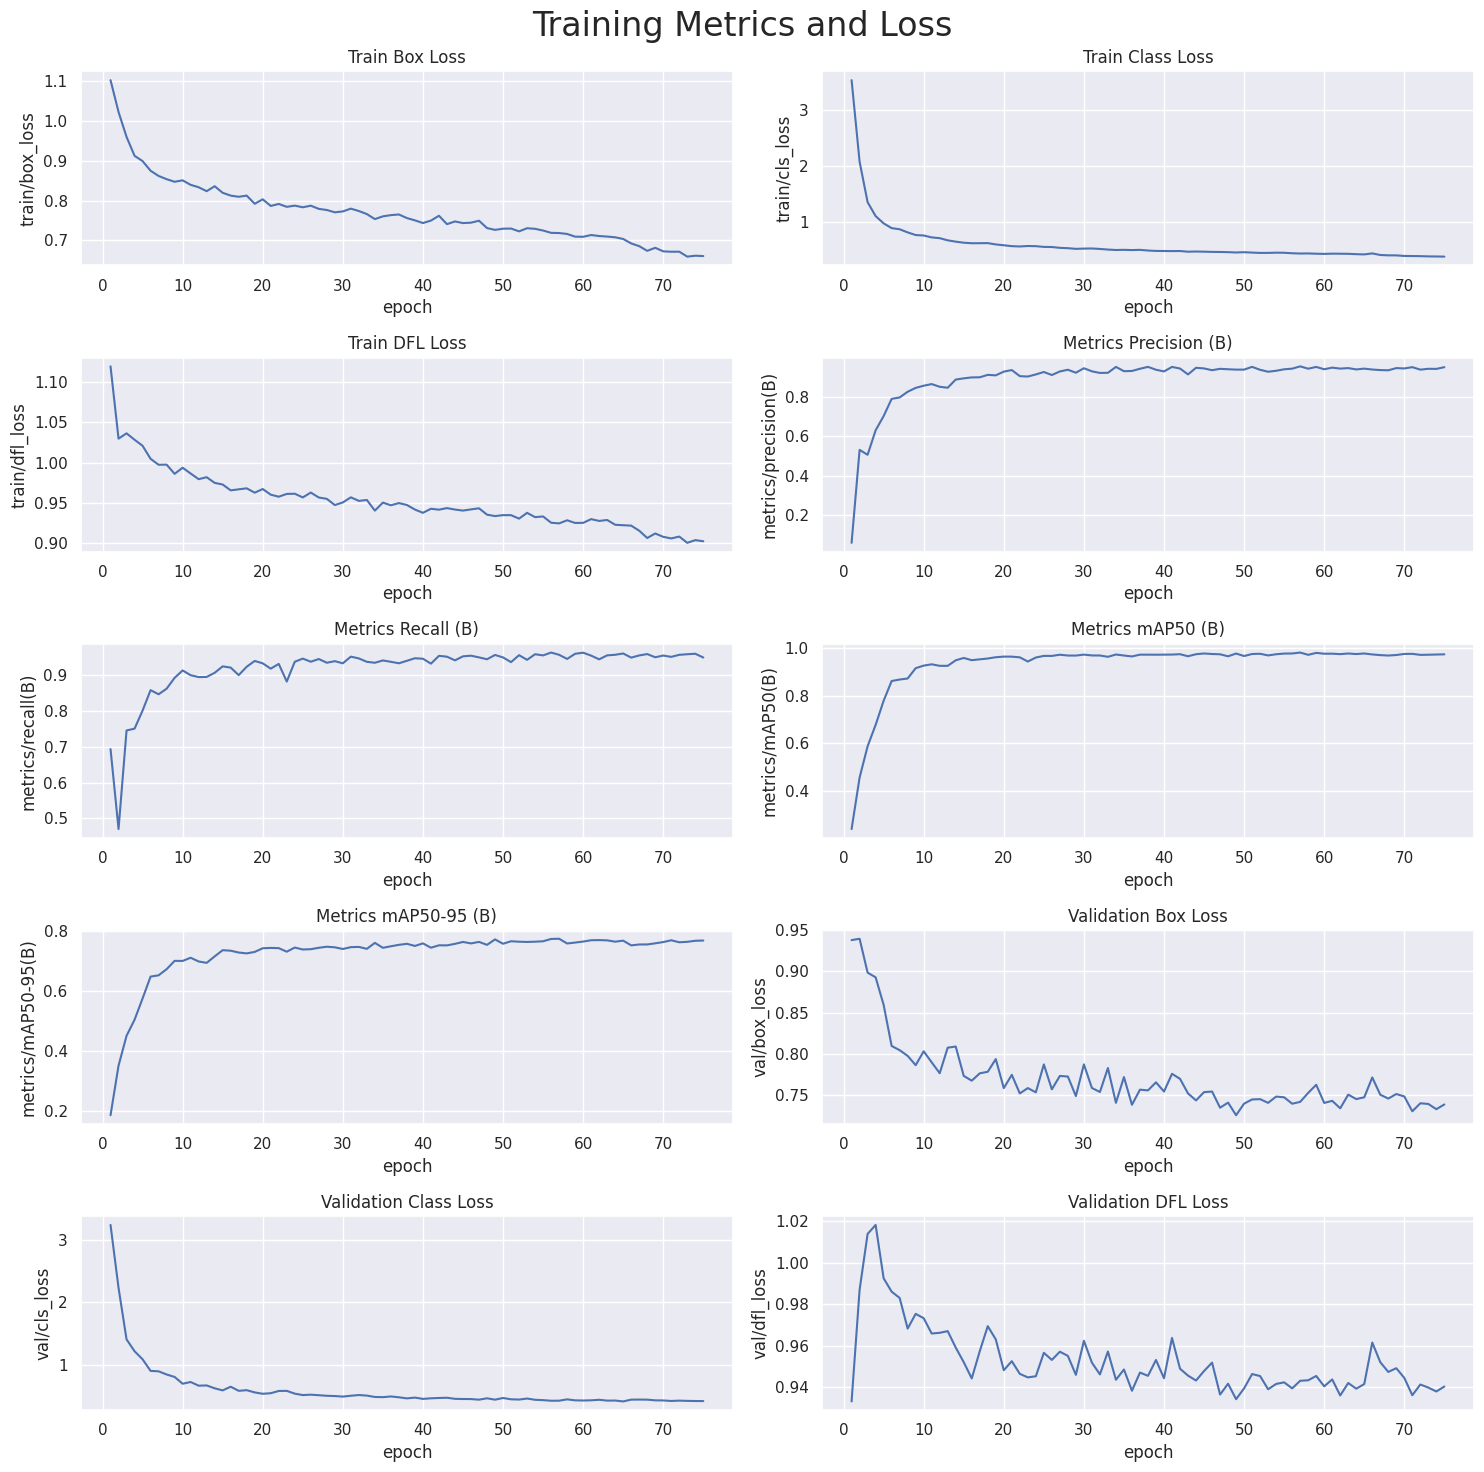

In [14]:
results.columns = results.columns.str.strip()
# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=results, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=results, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=results, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=results, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=results, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=results, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=results, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=results, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=results, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=results, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [15]:
# Loading the best performing model
Valid_model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics 8.3.29 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/test/labels... 107 images, 0 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<00:00, 259.92it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/test is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


                   all        107       2360      0.964      0.958      0.978      0.751
             1st Molar         97        317      0.937      0.937      0.966      0.653
          1st Premolar        106        380      0.991      0.992      0.994      0.777
             2nd Molar         67        137      0.855      0.821      0.909      0.545
          2nd Premolar        103        360       0.98      0.969      0.991      0.713
                Canine        106        386      0.996      0.995      0.994      0.849
       Central Incisor        107        390      0.996      0.997      0.995      0.858
       Lateral Incisor        107        390      0.996      0.992      0.995      0.862
Speed: 0.1ms preprocess, 3.8ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs/detect/val


In [16]:
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.9644780966567775
metrics/recall(B):  0.9575855272663274
metrics/mAP50(B):  0.9776551290352444
metrics/mAP50-95(B):  0.7509156064788035



image 1/1 /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/test/images/Fig106_SAU_JPG.rf.90850296b125ca3699dcc13d5878bad1.jpg: 320x640 5 1st Premolars, 1 2nd Premolar, 5 Canines, 4 Central Incisors, 4 Lateral Incisors, 42.2ms
Speed: 1.6ms preprocess, 42.2ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)


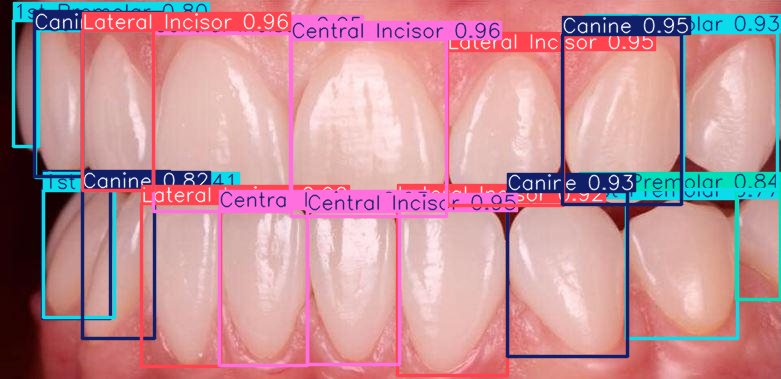


image 1/1 /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/test/images/Fig70_MYS_JPG.rf.a9e35336d399d2888b61b1a7652357fe.jpg: 288x640 4 1st Molars, 4 1st Premolars, 4 2nd Molars, 4 2nd Premolars, 4 Canines, 4 Central Incisors, 4 Lateral Incisors, 35.7ms
Speed: 1.1ms preprocess, 35.7ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 640)


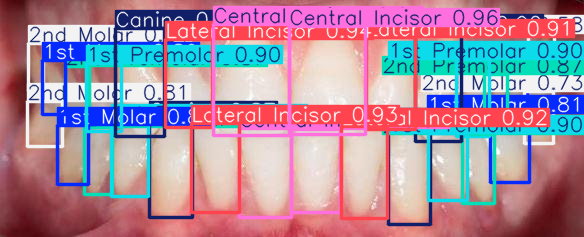


image 1/1 /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/test/images/Fig88_SAU_JPG.rf.b54fe599b1ae7e6dcde60621a0f6eae2.jpg: 320x640 4 1st Molars, 4 1st Premolars, 1 2nd Molar, 4 2nd Premolars, 4 Canines, 4 Central Incisors, 4 Lateral Incisors, 7.2ms
Speed: 1.4ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 640)


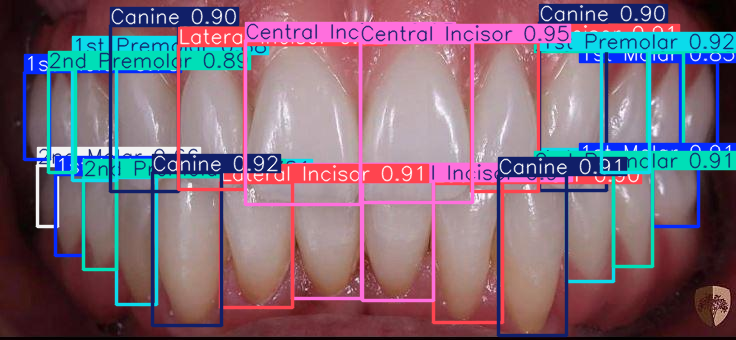


image 1/1 /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/test/images/Fig142_SAU_JPG.rf.ddf8cc39c0444c89ddab16b4c9dccecf.jpg: 288x640 4 1st Molars, 4 1st Premolars, 4 2nd Molars, 4 2nd Premolars, 4 Canines, 4 Central Incisors, 4 Lateral Incisors, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 640)


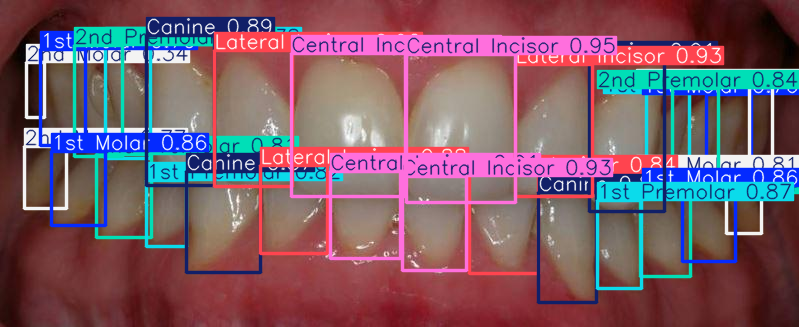


image 1/1 /kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/test/images/Fig87_MYS_JPG.rf.4e373d53f6b7fb2c0f3720edf4c83f6d.jpg: 256x640 4 1st Molars, 4 1st Premolars, 3 2nd Molars, 4 2nd Premolars, 4 Canines, 4 Central Incisors, 4 Lateral Incisors, 39.7ms
Speed: 1.6ms preprocess, 39.7ms inference, 1.2ms postprocess per image at shape (1, 3, 256, 640)


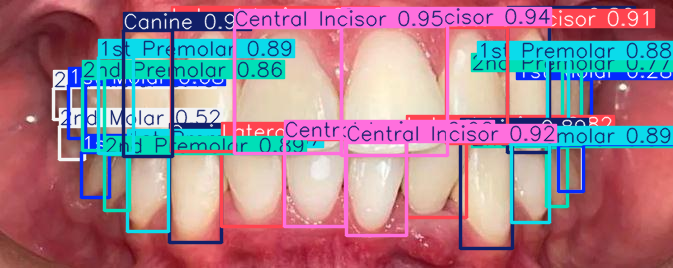

In [17]:
images = os.listdir("/kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/test/images")
for i in range(5):
    image = os.path.join("/kaggle/input/dental-anatomy-dataset-yolov8/Dental Dataset/test/images", images[i])
    result_predict = Valid_model.predict(source = image, imgsz=(640), iou=0.4)

    # show results
    plot = result_predict[0].plot()
    plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(plot))